In [207]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import googlemaps
from pprint import pprint
import json
import time
from scipy import stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
# Import API key
from api_keys import g_key

In [208]:
rent_df = pd.read_csv('rent20-22.csv')
rent_df

,Unnamed: 0,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,...,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,...,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,...,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,...,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,...,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,...,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,...,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4745,4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,...,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4746,4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,...,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4747,4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,...,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [173]:
#filter out only GA
ga_df = rent_df['state'] == 13
clean_ga_df= rent_df[ga_df]
clean_ga_df

,Unnamed: 0,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,...,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
14,14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,...,791,814.0,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250
15,15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,...,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520
16,16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,...,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215
17,17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,...,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980
18,18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,...,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,...,651,648.0,704.0,939,927.0,870.0,998,975.0,955.0,7950
2281,2296,13,311,White County,GA,602,619.0,693.0,606,623.0,...,764,763.0,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510
2282,2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,...,651,648.0,704.0,811,865.0,1000.0,998,975.0,1036.0,8895
2283,2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,...,738,740.0,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905


In [174]:
counties_df = pd.read_csv('list-counties-georgia.csv')
counties_df

,Sr.No,county name,FIPS code,County seat,Established
0,1,Appling County,1,Baxley,1818
1,2,Atkinson County,3,Pearson,1917
2,3,Bacon County,5,Alma,1914
3,4,Baker County,7,Newton,1825
4,5,Baldwin County,9,Milledgeville,1803
...,...,...,...,...,...
154,155,Whitfield County,313,Dalton,1851
155,156,Wilcox County,315,Abbeville,1857
156,157,Wilkes County,317,Washington,1777
157,158,Wilkinson County,319,Irwinton,1803


In [175]:
rent_per_county = pd.merge(clean_ga_df, counties_df, how="left", on=["county name"])
rent_per_county

,Unnamed: 0,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,...,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,Sr.No,FIPS code,County seat,Established
0,14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,...,1054.0,887.0,1151,1215.0,1036.0,3250,4,7,Newton,1825
1,15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,...,1054.0,1121.0,1151,1215.0,1359.0,91520,47,95,Albany,1853
2,16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,...,1054.0,1121.0,1151,1215.0,1359.0,29215,88,177,Leesburg,1826
3,17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,...,1054.0,1121.0,1151,1215.0,1359.0,8980,135,273,Dawson,1856
4,18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,...,1054.0,1121.0,1151,1215.0,1359.0,20810,159,321,Sylvester,1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,...,927.0,870.0,998,975.0,955.0,7950,153,309,Alamo,1912
155,2296,13,311,White County,GA,602,619.0,693.0,606,623.0,...,1006.0,1052.0,1035,1035.0,1121.0,28510,154,311,Cleveland,1857
156,2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,...,865.0,1000.0,998,975.0,1036.0,8895,156,315,Abbeville,1857
157,2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,...,975.0,1035.0,1132,1114.0,1154.0,9905,157,317,Washington,1777


In [176]:
clean_rent_per_county = rent_per_county[["state", "county name", "County seat","state initial","studio_2021","bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021"]]
clean_rent_per_county

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0
...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0


In [177]:
#Run a test to show lat and lng is found for each county center
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
Lat=[]
Lng=[]
countySeatsGa= []
countySeatstest = clean_rent_per_county['County seat'].tolist()
for x in countySeatstest:
    target_city = f"{x}, Georgia"
    params = {"address": target_city, "key": g_key}
    
    response = requests.get(base_url, params=params).json()
    
    try:
        lat = response["results"][0]["geometry"]["location"]["lat"]
        lng = response["results"][0]["geometry"]["location"]["lng"]
        Lat.append(lat)
        Lng.append(lng)
        countySeatsGa.append(target_city)
        print(f"{target_city} found!")
    except:
        print(f"{target_city} not found, skipping")
# Extract lat/lng
    
# Print results
print("done")

Newton, Georgia found!
Albany, Georgia found!
Leesburg, Georgia found!
Dawson, Georgia found!
Sylvester, Georgia found!
Athens, Georgia found!
Danielsville, Georgia found!
Watkinsville, Georgia found!
Lexington, Georgia found!
Winder, Georgia found!
Cartersville, Georgia found!
Carrollton, Georgia found!
Canton, Georgia found!
Jonesboro, Georgia found!
Marietta, Georgia found!
Newnan, Georgia found!
Dawsonville, Georgia found!
Decatur, Georgia found!
Douglasville, Georgia found!
Fayetteville, Georgia found!
Cumming, Georgia found!
Atlanta, Georgia found!
Lawrenceville, Georgia found!
Franklin, Georgia found!
McDonough, Georgia found!
Monticello, Georgia found!
Covington, Georgia found!
Dallas, Georgia found!
Jasper, Georgia found!
Zebulon, Georgia found!
Conyers, Georgia found!
Griffin, Georgia found!
Monroe, Georgia found!
Jackson, Georgia found!
Buchanan, Georgia found!
Barnesville, Georgia found!
Greenville, Georgia found!
Madison, Georgia found!
Waynesboro, Georgia found!
Appling, 

In [178]:
#Add lat and lng to dataframe
coord_county = pd.DataFrame(clean_rent_per_county)
coord_county['lat'] = Lat
coord_county['lng'] = Lng
coord_county['coordinates'] = list(zip(coord_county.lat, coord_county.lng))
coord_county

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,lat,lng,coordinates
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,31.312957,-84.335742,"(31.3129575, -84.3357424)"
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,31.578507,-84.155741,"(31.5785074, -84.15574099999999)"
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,31.732116,-84.170742,"(31.7321156, -84.1707423)"
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,31.773500,-84.446583,"(31.7735001, -84.4465826)"
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,31.530735,-83.835454,"(31.5307349, -83.8354542)"
...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,32.147120,-82.777917,"(32.1471202, -82.7779171)"
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,34.597040,-83.763237,"(34.5970402, -83.7632366)"
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,31.992122,-83.306824,"(31.9921223, -83.3068243)"
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,33.736795,-82.739309,"(33.7367948, -82.7393089)"


In [179]:
distance = []
origin = "Atlanta, Georgia"
destinations = coord_county.coordinates

gmaps = googlemaps.Client(key=g_key)
for destination in destinations:
    results = gmaps.distance_matrix(origin, destination, mode = 'driving')["rows"][0]["elements"][0]["distance"]["value"]
    results = round(results/1609)
    distance.append(results)

coord_county["Distance (miles)"] = distance
coord_county

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,lat,lng,coordinates,Distance (miles)
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,31.312957,-84.335742,"(31.3129575, -84.3357424)",205
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,31.578507,-84.155741,"(31.5785074, -84.15574099999999)",182
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,31.732116,-84.170742,"(31.7321156, -84.1707423)",176
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,31.773500,-84.446583,"(31.7735001, -84.4465826)",167
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,31.530735,-83.835454,"(31.5307349, -83.8354542)",172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,32.147120,-82.777917,"(32.1471202, -82.7779171)",160
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,34.597040,-83.763237,"(34.5970402, -83.7632366)",81
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,31.992122,-83.306824,"(31.9921223, -83.3068243)",152
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,33.736795,-82.739309,"(33.7367948, -82.7393089)",110


In [180]:
#Write DataFrame to CSV 
coord_county.to_csv("Rent Based on Distance.csv")

In [184]:
#create dataframe for one bedroom apt
new_rent = coord_county[["state", "county name", "County seat","state initial", "Distance (miles)", "bedroom_1_2021", "lat", "lng"]]


In [185]:
#show top 10 low rent prices

#filter out rent <= 492
low_rent = new_rent['bedroom_1_2021'] ==492
clean_low_rent = new_rent[low_rent]

#make clean_low_rent into a dataframe
min_rent = pd.DataFrame(clean_low_rent)
min_rent

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
75,13,Atkinson County,Pearson,GA,222,492.0,31.297703,-82.852367
83,13,Calhoun County,Morgan,GA,182,492.0,31.537673,-84.599360
95,13,Dodge County,Eastman,GA,138,492.0,32.197673,-83.177651
99,13,Emanuel County,Swainsboro,GA,176,492.0,32.597386,-82.333738
114,13,Jefferson County,Louisville,GA,145,492.0,33.001541,-82.411238
129,13,Schley County,Ellaville,GA,125,492.0,32.238214,-84.309080
130,13,Screven County,Sylvania,GA,204,492.0,32.750444,-81.636776
133,13,Stewart County,Lumpkin,GA,141,492.0,32.050990,-84.799090
142,13,Toombs County,Lyons,GA,186,492.0,32.204355,-82.321791
152,13,Wayne County,Jesup,GA,231,492.0,31.607436,-81.885392


In [186]:
#sort in descending order for bedroom price and show top 10 high rent prices
#coord_county.sort_values(by='bedroom_1_2021', ascending = False).head(10)
#filter out rent == 492
high_rent = new_rent['bedroom_1_2021'] ==1126
clean_high_rent = new_rent[high_rent]

#make clean_low_rent into a dataframe
max_rent = pd.DataFrame(clean_high_rent)
max_rent

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
9,13,Barrow County,Winder,GA,50,1126.0,33.992610,-83.720171
10,13,Bartow County,Cartersville,GA,43,1126.0,34.165097,-84.799938
11,13,Carroll County,Carrollton,GA,50,1126.0,33.580110,-85.076611
12,13,Cherokee County,Canton,GA,41,1126.0,34.236762,-84.490762
13,13,Clayton County,Jonesboro,GA,17,1126.0,33.521501,-84.353813
14,13,Cobb County,Marietta,GA,20,1126.0,33.952602,-84.549933
15,13,Coweta County,Newnan,GA,38,1126.0,33.380672,-84.799657
16,13,Dawson County,Dawsonville,GA,57,1126.0,34.421205,-84.119080
17,13,DeKalb County,Decatur,GA,6,1126.0,33.774828,-84.296312
18,13,Douglas County,Douglasville,GA,23,1126.0,33.751497,-84.747714


In [187]:
#use .describe in order to get the description of numerical data e.g. count, mean, std dev, percentiles (quartiles)
new_rent.describe().round(2)

,state,Distance (miles),bedroom_1_2021,lat,lng
count,159.0,159.00,159.00,159.00,159.00
mean,13.0,130.52,697.79,32.81,-83.58
std,0.0,69.66,209.40,1.18,1.04
min,13.0,0.00,492.00,30.70,-85.51
25%,13.0,75.50,535.00,31.80,-84.37
50%,13.0,121.00,634.00,32.76,-83.68
75%,13.0,186.50,767.00,33.78,-82.85
max,13.0,307.00,1126.00,34.95,-81.09


y= -1.54x +898.31
R Value: -0.5111
R^2 Value: 0.2612


<function matplotlib.pyplot.show(close=None, block=None)>

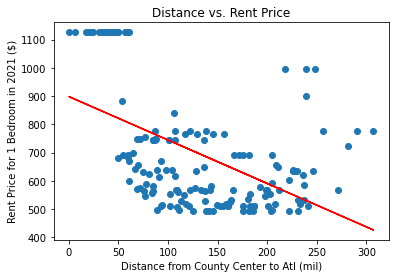

In [188]:
#create a scatter plot for Distance vs Rent Price for a 1 bedroom in 2021
#set x and y values
x_values = new_rent['Distance (miles)']
y_values = new_rent['bedroom_1_2021']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.ylabel('Rent Price for 1 Bedroom in 2021 ($)')
plt.xlabel('Distance from County Center to Atl (mil)')
plt.title(f"Distance vs. Rent Price")
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show
#Observations made from the data below.
#1. Linear regression has a negative slope indicating that the rent price decreases the further away form Atlanta you live
#2. Rent price is highest if you live within 60 miles of Atlanta
#3. Prices increased again when you get more than 200 miles outside of atlanta

In [192]:
import gmaps

# Access maps with unique API key
gmaps.configure(api_key=g_key)

# create coordinates by joining lat and long
locations = new_rent[["lat", "lng"]].astype(float)

# price as the weights
rent = new_rent["bedroom_1_2021"].astype(float)

# Plotting the heatmap
fig = gmaps.figure(center=(32.1656, -82.9001), zoom_level=6.6)

# Create heat layer
heatLayer = gmaps.heatmap_layer(locations, weights=rent, max_intensity = 1000)

# Add layer
fig.add_layer(heatLayer)


In [193]:

# Convert hotel name to list
min_rent_list = min_rent["County seat"].tolist()

# Add marker layer ontop of heat map
marker_locations = min_rent[['lat', 'lng']]

# Create a marker_layer using the hotel list to fill the info box
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [194]:
distance_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
group_names = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

withbins = coord_county

In [195]:
withbins["Miles Range"] = pd.cut(distance, distance_bins, labels=group_names, right=False)
withbins

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,lat,lng,coordinates,Distance (miles),Miles Range
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,31.312957,-84.335742,"(31.3129575, -84.3357424)",205,180-210
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,31.578507,-84.155741,"(31.5785074, -84.15574099999999)",182,180-210
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,31.732116,-84.170742,"(31.7321156, -84.1707423)",176,150-180
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,31.773500,-84.446583,"(31.7735001, -84.4465826)",167,150-180
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,31.530735,-83.835454,"(31.5307349, -83.8354542)",172,150-180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,32.147120,-82.777917,"(32.1471202, -82.7779171)",160,150-180
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,34.597040,-83.763237,"(34.5970402, -83.7632366)",81,60-90
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,31.992122,-83.306824,"(31.9921223, -83.3068243)",152,150-180
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,33.736795,-82.739309,"(33.7367948, -82.7393089)",110,90-120


In [196]:
distance_list = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

# Create empty list to fill with tumor vol data (for plotting)
price_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rangeDistance in distance_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    lastCount = withbins.loc[withbins["Miles Range"] == rangeDistance, "bedroom_1_2021"]
    # add subset 
    price_list.append(lastCount)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = lastCount.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= lastCount.loc[(lastCount < lower_bound)|(lastCount > upper_bound)]
    print(f"{rangeDistance}'s potential outliers: {outliers}")

<30's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
30-60's potential outliers: 33    680.0
34    691.0
37    689.0
55    884.0
Name: bedroom_1_2021, dtype: float64
60-90's potential outliers: 25    1126.0
28    1126.0
Name: bedroom_1_2021, dtype: float64
90-120's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
120-150's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
150-180's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
180-210's potential outliers: 0     690.0
1     690.0
82    656.0
Name: bedroom_1_2021, dtype: float64
210-240's potential outliers: 56    901.0
64    996.0
66    996.0
Name: bedroom_1_2021, dtype: float64
240-270's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
270-310's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)


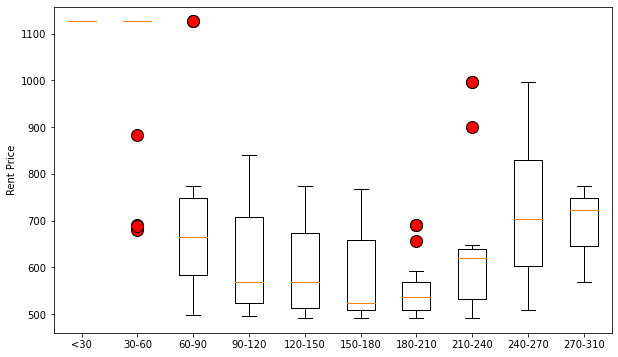

In [197]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
red = dict(marker='o', markerfacecolor='r', markersize=12,)
ax1.boxplot(price_list, flierprops=red,)
plt.xticks([1, 2, 3, 4, 5, 6,7,8,9,10], distance_list)
ax1.set_ylabel('Rent Price')
            
plt.show()

In [198]:
averagestudio = withbins.groupby(["Miles Range"]).mean()["studio_2021"]
average1bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]
average2bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_2_2021"]
average3bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_3_2021"]
average4bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]

In [199]:
distanceRangePriceSummary = pd.DataFrame({"Average Price Studio" : averagestudio.round(2),
                                 "Average price 1bedroom ": average1bedroom.round(2),
                                 "Average price 2bedroom ": average2bedroom.round(2),
                                 "Average price 3bedroom ": average3bedroom.round(2),
                                 "Average price 4bedroom ": average4bedroom.round(2),
                                 "Miles Range":["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"], })


distanceRangePriceSummary

,Average Price Studio,Average price 1bedroom,Average price 2bedroom,Average price 3bedroom,Average price 4bedroom,Miles Range
Miles Range,,,,,,
<30,1101.00,1126.00,1284.00,1615.00,1126.00,<30
30-60,1019.37,1043.89,1205.37,1529.05,1043.89,30-60
60-90,637.00,686.50,831.47,1091.87,686.50,60-90
90-120,583.17,616.74,763.13,1002.78,616.74,90-120
120-150,571.00,603.10,724.20,963.80,603.10,120-150
150-180,553.50,573.29,706.57,942.21,573.29,150-180
180-210,539.67,551.38,678.90,895.29,551.38,180-210
210-240,632.00,648.82,798.82,1075.53,648.82,210-240
240-270,713.75,728.75,887.25,1241.25,728.75,240-270


<AxesSubplot:xlabel='Miles Range'>

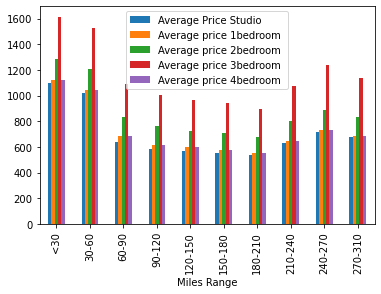

In [200]:
distanceRangePriceSummary.plot(x="Miles Range", y=["Average Price Studio",
                                                  "Average price 1bedroom ",
                                                  "Average price 2bedroom ",
                                                  "Average price 3bedroom ",
                                                  "Average price 4bedroom "], kind ="bar")

In [201]:
leasing_office_find = new_rent
leasing_office_find

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
0,13,Baker County,Newton,GA,205,690.0,31.312957,-84.335742
1,13,Dougherty County,Albany,GA,182,690.0,31.578507,-84.155741
2,13,Lee County,Leesburg,GA,176,690.0,31.732116,-84.170742
3,13,Terrell County,Dawson,GA,167,690.0,31.773500,-84.446583
4,13,Worth County,Sylvester,GA,172,690.0,31.530735,-83.835454
...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,160,510.0,32.147120,-82.777917
155,13,White County,Cleveland,GA,81,623.0,34.597040,-83.763237
156,13,Wilcox County,Abbeville,GA,152,510.0,31.992122,-83.306824
157,13,Wilkes County,Washington,GA,110,562.0,33.736795,-82.739309


In [204]:
#check for a leasing office near each county center
# params dictionary to update each iteration
params = {
    "radius": 30,
    "types": "office",
    "keyword": "leasing office",
    "key": g_key
}

# Use the lat/lng we recovered to identify airports
for index, row in leasing_office_find.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lng = row["lng"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"

    # Use the search term: "International Airport" and our lat/lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # make request and print url
    name_address = requests.get(base_url, params=params)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(name_address.url)

    # convert to json
    name_address = name_address.json()
    # print(json.dumps(name_address, indent=4, sort_keys=True))

    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        leasing_office_find.loc[index, 'Leasing Office'] = name_address["results"][0]["name"]
        leasing_office_find.loc[index, 'Leasing Office Address'] = name_address["results"][0]["vicinity"]
        leasing_office_find.loc[index, 'Leasing Office Rating'] = name_address["results"][0]["rating"]
    except (KeyError, IndexError):
        leasing_office_find.loc[index, 'Leasing Office'] = "No leasing office nearby"
        leasing_office_find.loc[index, 'Leasing Office Address'] = "No"
        leasing_office_find.loc[index, 'Leasing Office Rating'] = "No"
        print("Missing field/result... skipping.")
        
leasing_office_find

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng,Leasing Office,Leasing Office Address,Leasing Office Rating
0,13,Baker County,Newton,GA,205,690.0,31.312957,-84.335742,No leasing office nearby,No,No
1,13,Dougherty County,Albany,GA,182,690.0,31.578507,-84.155741,"Lone Star Equities, INC.","323 Pine Ave #206, Albany",4.5
2,13,Lee County,Leesburg,GA,176,690.0,31.732116,-84.170742,Park Senior Village,Leesburg,0
3,13,Terrell County,Dawson,GA,167,690.0,31.773500,-84.446583,Dawson Compress & Storage,"151 N Main St, Dawson",0
4,13,Worth County,Sylvester,GA,172,690.0,31.530735,-83.835454,No leasing office nearby,No,No
...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,160,510.0,32.147120,-82.777917,No leasing office nearby,No,No
155,13,White County,Cleveland,GA,81,623.0,34.597040,-83.763237,Whitehall Commons,Cleveland,4
156,13,Wilcox County,Abbeville,GA,152,510.0,31.992122,-83.306824,No leasing office nearby,No,No
157,13,Wilkes County,Washington,GA,110,562.0,33.736795,-82.739309,Georgia Realty Sales,"19 East Square, Washington",4.3


In [205]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)
#create a heat map
locations = leasing_office_find[["lat", "lng"]].astype(float)
weights = leasing_office_find["bedroom_1_2021"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=weights, 
                                 dissipating=False, max_intensity=500, point_radius =1)

fig.add_layer(heat_layer)

info_box_template = """
<dl>
<dt>Name</dt><dd>{Leasing Office}</dd>
<dt>City</dt><dd>{County seat}</dd>
<dt>Rent_Price_1bedroom</dt><dd>{bedroom_1_2021}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
leasing_office_info = [info_box_template.format(**row) for index, row in leasing_office_find.iterrows()]
locations = leasing_office_find[["lat", "lng"]]

In [206]:
marker_layer = gmaps.marker_layer(locations, info_box_content = leasing_office_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))